## Part 1 Scratching data
- use api of coinmarketcap.com to fetch data of cryptos

In [57]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'd6decf19-56fb-4957-8de3-df5ccafabb91',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  import pandas as pd
  df = pd.json_normalize(data, record_path='data')
  print(df)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

         id                    name    symbol                    slug  \
0         1                 Bitcoin       BTC                 bitcoin   
1      1027                Ethereum       ETH                ethereum   
2       825             Tether USDt      USDT                  tether   
3      1839                     BNB       BNB                     bnb   
4        52                     XRP       XRP                     xrp   
...     ...                     ...       ...                     ...   
4995  23348  Decentralized Pictures      FILM  decentralized-pictures   
4996  27753      Mountain Sea World       MAW      mountain-sea-world   
4997  18853               MonoMoney      MONO               monomoney   
4998  26767                PEPEARMY  PEPEARMY                pepearmy   
4999  22899          Digimon Rabbit       DRB          digimon-rabbit   

      num_market_pairs                date_added  \
0                10485  2010-07-13T00:00:00.000Z   
1                 7

There are nested json data in the coming data, normalize them with pd.json normalize

## Tansformation or cleaning
-  mainly nothing to clear. Remove time in date_added.

In [59]:
def reset_date(str):
    return str.split('T')[0]
df['date_added'] = df['date_added'].apply(reset_date)
print(df)
df.to_csv('data.csv')

         id                    name    symbol                    slug  \
0         1                 Bitcoin       BTC                 bitcoin   
1      1027                Ethereum       ETH                ethereum   
2       825             Tether USDt      USDT                  tether   
3      1839                     BNB       BNB                     bnb   
4        52                     XRP       XRP                     xrp   
...     ...                     ...       ...                     ...   
4995  23348  Decentralized Pictures      FILM  decentralized-pictures   
4996  27753      Mountain Sea World       MAW      mountain-sea-world   
4997  18853               MonoMoney      MONO               monomoney   
4998  26767                PEPEARMY  PEPEARMY                pepearmy   
4999  22899          Digimon Rabbit       DRB          digimon-rabbit   

      num_market_pairs  date_added  \
0                10485  2010-07-13   
1                 7479  2015-08-07   
2        

Now some simple plots, for example, highest price

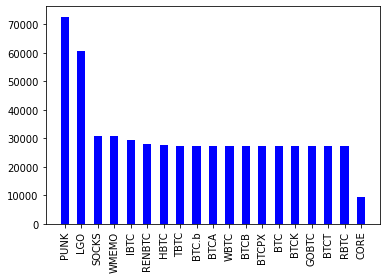

<Figure size 2880x288 with 0 Axes>

In [81]:
from matplotlib import pyplot as plt
df.sort_values(by = ['quote.USD.price'], ascending=False, inplace = True)
plt.bar( df['symbol'].head(20),df['quote.USD.price'].head(20),color = 'blue', width=0.5)
plt.xticks(rotation = 'vertical')
plt.figure().set_figwidth(40)
plt.show()

Surprisingly BTC is not the most expensive of all these currencies. It is clear though, that most of them are BTC related.

Or, say change in percant of price in 24H

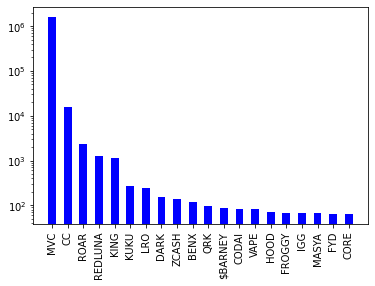

<Figure size 2880x288 with 0 Axes>

In [83]:
df.sort_values(by = ['quote.USD.percent_change_24h'], ascending=False, inplace = True)
plt.bar( df['symbol'].head(20),df['quote.USD.percent_change_24h'].head(20),color = 'blue', width=0.5)
plt.xticks(rotation = 'vertical')
plt.yscale('log')
plt.figure().set_figwidth(40)
plt.show()

It really impresses me how some crytos' price can rise or drop in very short time lol. 1000 times higher price, huh.


- a box plot of price

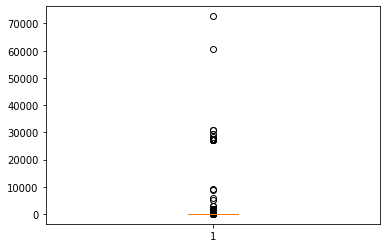

In [87]:
plt.boxplot(df['quote.USD.price'])
plt.show()

Seems that most cryptos have very low prices. Only a few of them have prices that are higher than 10k.